# Machine Learning (laboratory instruction)
## Linear regression (part 3)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 3).ipynb
+-- 🖼 dataset.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Your goal is to implement the regression algorithm that will be able to predict the weekly employee salary.

### Task 1. Read the dataset from file.
Read the data from `dataset.npz` file. This is a univariate data with information about the weekly salary of the employees. The function of the data is unknown.

**Tip**: You can use below code to read the data:

```python
with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
```

In [1]:
import numpy as np

with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
print(x.shape, y.shape)

(50,) (50,)


### Task 2. Display the data.

Display the data and try to guess what function approximates the data.

Text(0, 0.5, 'Weekly salary (dollars)')

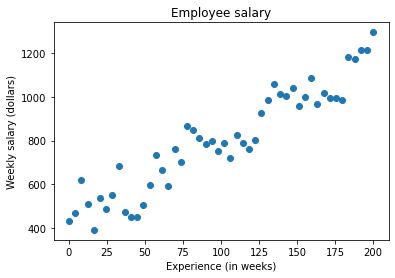

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title("Employee salary")
plt.xlabel("Experience (in weeks)")
plt.ylabel("Weekly salary (dollars)")
# The easiest to implement function to approximate the data can be linear funtion but to achieve 
# better performance we can use polynomial function

### Task 3. Implement the function.
Implement function $f$ that approximates the data. The $a$ and $b$ are the hyperparameters of the function.

$$
f(x) = ax + b
$$

Text(0, 0.5, 'Weekly salary (dollars)')

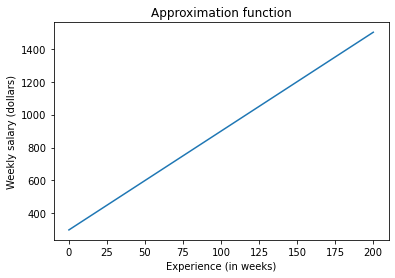

In [3]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
def fun(a, b, x):
    return a*x+b
y1 = fun(6, 300, x)
plt.plot(x, y1)
plt.title("Approximation function")
plt.xlabel("Experience (in weeks)")
plt.ylabel("Weekly salary (dollars)")

### Task 4. Implement cost function.

Implement mean squared error (MSE) function and its derivatives with respect to hyperparameters of the function $f$ (implemented in previous task). This is the cost function that you will have to minimize.

* MSE formula:
    $MSE = \frac{1}{m}\sum(f(x) - y)^2$

* MSE derivative:
    $MSE' = \frac{2}{m}\sum(f(x) - y)$

* MSE partial derivatives (if $f(x) = ax + b$):
    * $MSE'(a) = \frac{2}{m}\sum(f(x) - y)x$
    * $MSE'(b) = \frac{2}{m}\sum(f(x) - y)$


In [4]:
def MSE(a, b):
    total_mse = 0
    for i in range(len(x)):
        mse = (fun(a, b, x[i]) - y[i])**2
        total_mse += mse
        i += 1
    return total_mse/len(x)

def MSE_prim(a, b):
    total_mse_prim = 0
    for i in range(len(x)):
        mse_prim = (fun(a, b, x[i]) - y[i])
        total_mse_prim += mse_prim
        i += 1
    return 2*total_mse_prim/len(x)

def der_a(a, b):
    total_der_a = 0
    for i in range(len(x)):
        der_a = (fun(a, b, x[i]) - y[i])*x[i]
        total_der_a += der_a
        i += 1
    return 2*total_der_a/len(x)
    
def der_b(a, b):
    total_der_b = 0
    for i in range(len(x)):
        der_b = fun(a, b, x[i]) - y[i]
        total_der_b += der_b
        i += 1
    return 2*total_der_b/len(x)   

### Task 5. Train the model.

Train the model using Gradient Descent algorithm. Find proper learning rate $\alpha$ (if the cost function is growing it means that the learning rage is too high, try to decrease it).

*Note: Training may take time. Do not hesitate to set the number of iterations to high value e.g. 50000.*

In [5]:
alpha = 0.00001
def min_a(a, b):
    return a - alpha*der_a(a, b)
def min_b(a, b):
    return b - alpha*der_b(a, b)

epochs = 50000
def step(a, b):
    following_steps = []
    for i in range(epochs):
        following_steps.append((a , b))
        a = min_a(a,b)
        b = min_b(a,b)
    return following_steps

val_a_b = step(6,300)

### Task 6. Display the results.
Display the data and function on the same chart.

Text(0, 0.5, 'Weekly salary (dollars)')

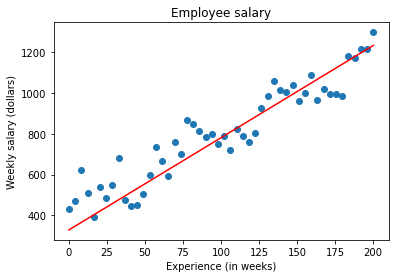

In [6]:
plt.scatter(x, y)
plt.plot(x, fun(val_a_b[-1][0], val_a_b[-1][1], x), color="red")
plt.title("Employee salary")
plt.xlabel("Experience (in weeks)")
plt.ylabel("Weekly salary (dollars)")

### Task 7. Prediction.
Predict at least 3 results for different numbers. Present the prediction and original data (with different colors) at the same chart.

Example:

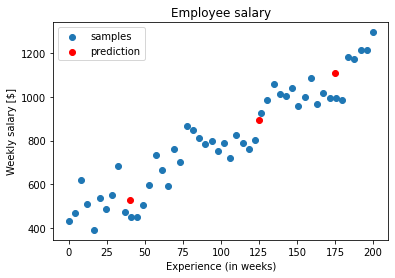

Text(0, 0.5, 'Weekly salary (dollars)')

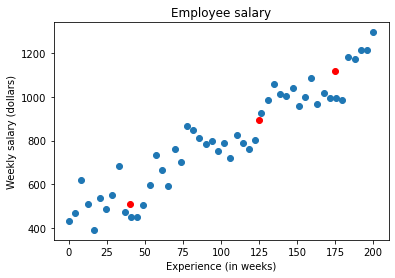

In [7]:
pred_x = np.array([40, 125, 175])
pred_y = fun(val_a_b[-1][0], val_a_b[-1][1], pred_x)
plt.scatter(x, y)
plt.scatter(pred_x, pred_y, color="red")
plt.title("Employee salary")
plt.xlabel("Experience (in weeks)")
plt.ylabel("Weekly salary (dollars)")